In [2]:
import numpy as np

# Define the matrix and RHS vector
A = np.array([[1, 0, -1],
              [0, 1,  3],
              [0, 0, -2]], dtype=float)
b = np.array([0, 0, 1], dtype=float)

# Solve the system
solution = np.linalg.solve(A, b)
print(solution)

[-0.5  1.5 -0.5]


In [3]:
# Define the matrix and RHS vector
A = np.array([[1, 0, 1],
              [2, 0,  -3],
              [-2, 1, 0]], dtype=float)
b = np.array([0, 1, 0], dtype=float)

# Solve the system
solution = np.linalg.solve(A, b)
print(solution)

[ 0.2  0.4 -0.2]


In [183]:
def gauss_jordan(A):
    """
    Performs Gauss-Jordan elimination on a matrix A.
    Reduces it to row-reduced echelon form (RREF).
    Works for rectangular matrices.
    """
    M = [row[:] for row in A]  # copy
    n_rows = len(M)
    n_cols = len(M[0])
    lead = 0

    for r in range(n_rows):
        if lead >= n_cols:
            break
        i = r
        # Find a row with non-zero in the lead column
        while M[i][lead] == 0:
            i += 1
            if i == n_rows:
                i = r
                lead += 1
                if lead == n_cols:
                    return M
        # Swap rows
        M[i], M[r] = M[r], M[i]
        # Normalize pivot row
        lv = M[r][lead]
        M[r] = [mrx / lv for mrx in M[r]]
        # Eliminate other rows
        for i in range(n_rows):
            if i != r:
                lv = M[i][lead]
                M[i] = [iv - lv*rv for iv, rv in zip(M[i], M[r])]
        lead += 1
    return M

# Example
A = [
    [0,3,5,4],
    [2,4,5,1],
    [3,4,5,6]
]

result = gauss_jordan(A)
for row in result:
    print([round(x,2) for x in row])


[1.0, 0.0, 0.0, 5.0]
[0.0, 1.0, 0.0, -13.0]
[0.0, 0.0, 1.0, 8.6]


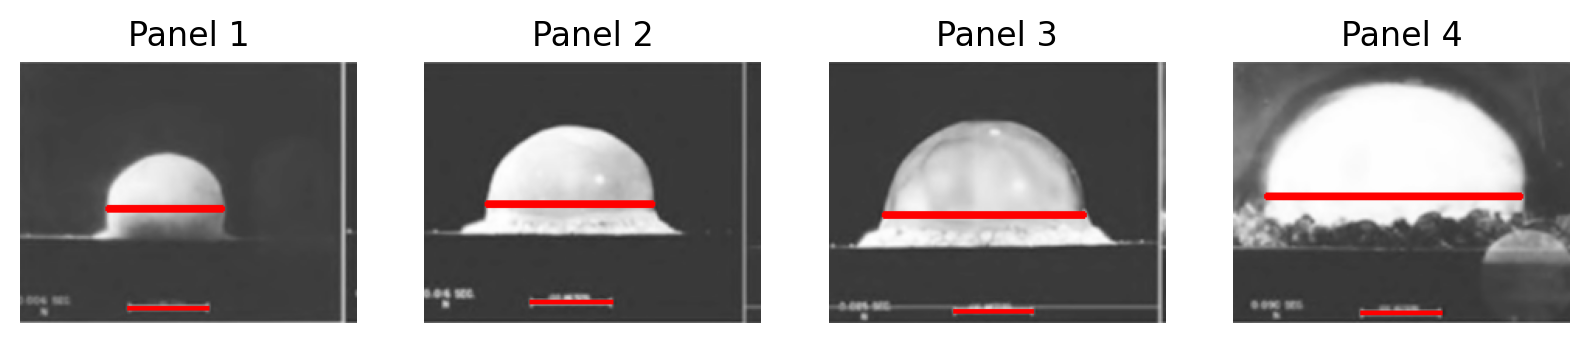

Relative (longer/shorter) bar length ratios: [1.4528301886792452, 2.037037037037037, 2.5384615384615383, 3.150943396226415]


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("brr patapim.png")

# Convert to RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Split into 4 panels
h, w, _ = rgb.shape
panel_width = w // 4
panels = [rgb[:, i*panel_width:(i+1)*panel_width, :] for i in range(4)]

ratios = []

for idx, panel in enumerate(panels):
    # Create mask for pure red (255,0,0)
    lower_red = np.array([200, 0, 0])   # allow tolerance
    upper_red = np.array([255, 50, 50])
    mask = cv2.inRange(panel, lower_red, upper_red)

    # Find contours of red bars
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    lengths = []
    for cnt in contours:
        x, y, w_box, h_box = cv2.boundingRect(cnt)
        lengths.append(w_box)  # horizontal length of bar

    if len(lengths) >= 2:
        lengths = sorted(lengths, reverse=True)
        ratio = lengths[0] / lengths[1]
        ratios.append(ratio)
    else:
        ratios.append(None)
plt.figure(figsize=(10,4), dpi=200)
for idx, panel in enumerate(panels):
    plt.subplot(1,4,idx+1)
    plt.imshow(panel)
    plt.title(f"Panel {idx+1}")
    plt.axis("off")


plt.show()

print("Relative (longer/shorter) bar length ratios:", ratios)


In [31]:
radii = 100*np.array(ratios) / 2
times = np.array([6,16,25,90])*1e-3
rho = 1
print("r(m)",radii)
print("t(s)",times)

E = rho * radii**5  / times**2
print("E(J)",E)

tnt_ton = 4.184e9 
E_tnt = E / tnt_ton
print("E (tonTNT)",E_tnt)

r(m) [ 72.64150943 101.85185185 126.92307692 157.54716981]
t(s) [0.006 0.016 0.025 0.09 ]
E(J) [5.61851829e+13 4.28158611e+13 5.27014959e+13 1.19830676e+13]
E (tonTNT) [13428.58099309 10233.23640519 12595.95981206  2864.02190103]


In [35]:
r  = 33.2 
ly = 9.4607e15 
E = 1e44
rho = 2e-21 

t = np.sqrt((r*ly)**5 * rho / E)
print(t)

tyr = t / 365.25 / 24 / 60 / 60 
print(tyr)

247268266973.62103
7835.458557482857


In [36]:
A = np.array([[0, 1, -1],
              [1, 2,  3],
              [-1, -1, -2]], dtype=float)
b = np.array([0, 1, 0], dtype=float)

# Solve the system
solution = np.linalg.solve(A, b)
print(solution)

[-1.5  0.5  0.5]


In [4]:
# Define the matrix and RHS vector
import numpy as np
A = np.array([[1, 1/2, 1],
              [2, 3/2, 0],
              [-1, -1, 0]
              ], dtype=float)
b = np.array([0, 1, 0], dtype=float)

# Solve the system
solution = np.linalg.solve(A, b)
print(solution)

[ 2. -2. -1.]


C:\Users\verci\AppData\Local\Temp\ipykernel_15968\2251016733.py:8: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,1/x**(1/2))
C:\Users\verci\AppData\Local\Temp\ipykernel_15968\2251016733.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,1/x)


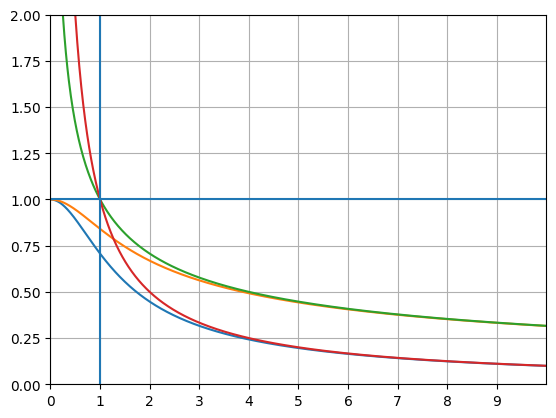

In [131]:
x = np.linspace(0,10,1000)
A0 = 1 
xs = 1
A = A0 / np.sqrt(x**2+xs**2)
A1 = A0 /(x**2+xs**2)**(1/4)
plt.plot(x,A)
plt.plot(x,A1)
plt.plot(x,1/x**(1/2))
plt.plot(x,1/x)
plt.axvline(xs)
plt.axhline(A0)
plt.ylim(0,2)
plt.xlim(0,10)
plt.xticks(range(0,10,1))
plt.grid()

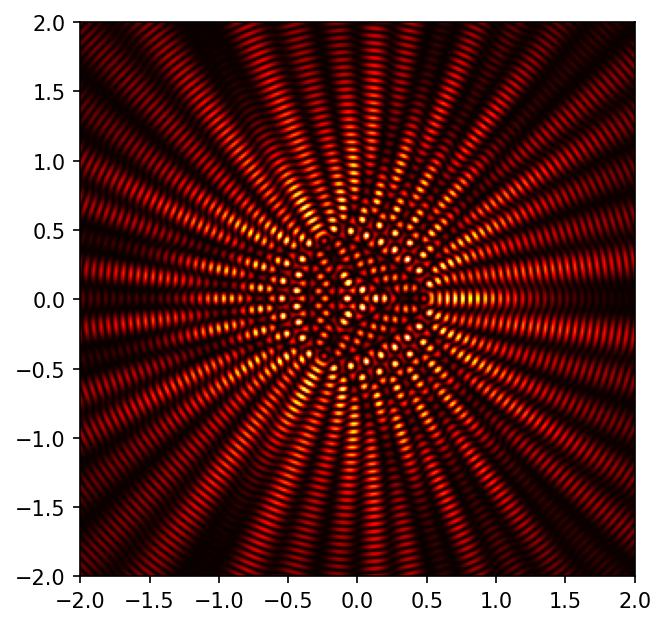

In [138]:
import matplotlib.pyplot as plt 
ext = 2
x = np.linspace(-ext,ext,300)
y = np.linspace(-ext,ext,300)
xv, yv = np.meshgrid(x,y) 

f = 60

distance = 0.5
n = 3
offset = 0
angles = offset+np.arange(0,360,(360/n))#[0,90,180,270]
total = 0
for angle in angles:
    angle = np.deg2rad(angle)
    r = np.sqrt((xv-distance*np.cos(angle))**2+(yv-distance*np.sin(angle))**2)
    A = np.cos(f*r) / (r**2+1)**(1/2)
    total += A
total = total**2
p99 = np.percentile(total, 99.95)
total[total>=p99] =p99
plt.figure(dpi=150)
plt.imshow(total,extent=[-ext,ext,-ext,ext],cmap = 'hot')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
c = 2               # wave speed
x = np.linspace(-10, 10, 200)
dx = x[1] - x[0]
u0 = np.exp(-(x)**2)    # initial displacement u(x,0)
v0 = np.zeros_like(x)             # right-moving at speed s
fpss = 30
t = np.arange(0, 15, 1/fpss)  # simulation time

# Laplacian with absorbing boundaries
def laplacian(u, dx, bc = 'dirichlet'):
    dudx2 = np.zeros_like(u)
    dudx2[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    if bc == 'neumann':
        # reflecting boundary condition
        dudx2[0]  = dudx2[1]
        dudx2[-1] = dudx2[-2]
    elif bc == 'dirichlet':
        dudx2[0]  = (u[1] - 2*u[0] + 0.0) / dx**2      # left boundary
        dudx2[-1] = (0.0 - 2*u[-1] + u[-2]) / dx**2    # right boundary
    return dudx2

# RK4 step for wave equation
def rk4_step(u, v, dt):
    def dudt(u, v): return v
    def dvdt(u, v): return c**2 * laplacian(u, dx)

    k1u, k1v = dudt(u, v), dvdt(u, v)
    k2u, k2v = dudt(u + 0.5*dt*k1u, v + 0.5*dt*k1v), dvdt(u + 0.5*dt*k1u, v + 0.5*dt*k1v)
    k3u, k3v = dudt(u + 0.5*dt*k2u, v + 0.5*dt*k2v), dvdt(u + 0.5*dt*k2u, v + 0.5*dt*k2v)
    k4u, k4v = dudt(u + dt*k3u, v + dt*k3v), dvdt(u + dt*k3u, v + dt*k3v)

    u_next = u + dt/6*(k1u + 2*k2u + 2*k3u + k4u)
    v_next = v + dt/6*(k1v + 2*k2v + 2*k3v + k4v)
    return u_next, v_next

# Set up figure
fig, ax = plt.subplots(figsize=(9,3))
line, = ax.plot([], [], lw=2)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")

# Initialize
def init():
    line.set_data([], [])
    return line,

# Animation function
u, v = u0.copy(), v0.copy()
dt = t[1] - t[0]
def animate(i):
    global u, v
    u, v = rk4_step(u, v, dt)
    line.set_data(x, u)
    ax.set_title(f"Wave Equation t={t[i]:.2f}s")
    return line,

# Create animation
anim = FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=50, blit=True)
anim.save("wave_equation_1d_5.gif", writer=PillowWriter(fps=fpss))
plt.close(fig)


In [164]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
v = 2.5
lambda_ = 2
A = 1

omega = 2*np.pi*v / lambda_
k = omega / lambda_
x = np.linspace(-10, 10, 1000)
fpss = 30
t = np.arange(0, 10, 1/fpss)  # time array for frames

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(9,3))
line, = ax.plot([], [], lw=2)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, 1.2*A)
ax.set_xlabel("x")
ax.set_ylabel("f(x,t)")
#ax.set_title("Traveling Wave Animation")

# Initialization function
def init():
    line.set_data([], [])
    return line,
r = np.sqrt(x**2)
# Animation function (updates each frame)
def animate(i):
    ax.set_title(f"Wave Animation t={t[i]:.2f}")
    y = A * np.cos(k*r - omega*t[i]) / (x**2+1)**(1/2)
    y = y**2
    line.set_data(x, y)
    return line,

# Create animation
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=len(t), interval=50, blit=True)

# Save as GIF
anim.save("traveling_wave_3.gif", writer=PillowWriter(fps=fpss))

plt.close(fig)  # close figure to avoid double display


In [157]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
v = 0.25
lambda_ = 0.4
A0 = 1
rs = 0.5

amax = (A0 / (rs**2)**(1/4))**2
omega = 2*np.pi*v / lambda_
k = 2*np.pi / lambda_   # k = 2π / λ

# 2D grid
ext = 2
x = np.linspace(-ext, ext, 300)
y = np.linspace(-ext, ext, 300)
xv, yv = np.meshgrid(x, y)

# Time array
fpss = 30
t = np.arange(0, 5, 1/fpss)  # 5 seconds animation

# Set up figure
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(np.zeros_like(xv), extent=[-ext,ext,-ext,ext],
               cmap='hot', vmin=0, vmax=amax)
ax.set_xlabel("x")
ax.set_ylabel("y")

# Animation function
def animate(i):
    r = np.sqrt(xv**2 + yv**2)
    A = A0 * np.cos(k*r - omega*t[i]) / (r**2 + rs**2)**(1/4)
    A = A**2
    im.set_data(A)
    ax.set_title(f"t = {t[i]:.2f}s")
    return im,

# Create animation
anim = FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

# Save as GIF
anim.save("traveling_wave_2d.gif", writer=PillowWriter(fps=fpss))
plt.close(fig)


In [165]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
v = 0.25
lambda_ = 0.4
A0 = 1
rs = 0.5

amax = (A0 / (rs**2)**(1/4))**2
omega = 2*np.pi*v / lambda_
k = 2*np.pi / lambda_   # k = 2π / λ

# 2D grid
ext = 2
x = np.linspace(-ext, ext, 300)
y = np.linspace(-ext, ext, 300)
xv, yv = np.meshgrid(x, y)

# Angular Gaussian filter parameters
sigma = np.pi / 4  # 45 degrees in radians
theta = np.arctan2(yv, xv)  # angle of each point
W = np.exp(-(theta**2)/(2*sigma**2))  # Gaussian weighting

# Time array
fpss = 30
t = np.arange(0, 5, 1/fpss)  # 5 seconds animation

# Set up figure
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(np.zeros_like(xv), extent=[-ext,ext,-ext,ext],
               cmap='hot', vmin=0, vmax=amax)
ax.set_xlabel("x")
ax.set_ylabel("y")

# Animation function
def animate(i):
    r = np.sqrt(xv**2 + yv**2)
    A = A0 * np.cos(k*r - omega*t[i]) / (r**2 + rs**2)**(1/4)
    A *= W
    A = A**2
    im.set_data(A)
    ax.set_title(f"t = {t[i]:.2f}s")
    return im,

# Create animation
anim = FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

# Save as GIF
anim.save("traveling_wave_2d_directed.gif", writer=PillowWriter(fps=fpss))
plt.close(fig)


In [166]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
v = 0.25
lambda_ = 0.4
A0 = 1
rs = 0.5

amax = (A0 / (rs**2)**(1/4))**2
omega = 2*np.pi*v / lambda_
k = 2*np.pi / lambda_   # k = 2π / λ

# 2D grid
ext = 2
x = np.linspace(-0.2, 2*ext, 300)
y = np.linspace(-ext, ext, 300)
xv, yv = np.meshgrid(x, y)

# Angular Gaussian filter parameters
sigma = np.pi / 4  # 45 degrees in radians
theta = np.arctan2(yv, xv)  # angle of each point
W = np.exp(-(theta**2)/(2*sigma**2))  # Gaussian weighting

# Time array
fpss = 30
t = np.arange(0, 5, 1/fpss)  # 5 seconds animation

# Set up figure
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(np.zeros_like(xv), extent=[-ext,ext,-ext,ext],
               cmap='hot', vmin=0, vmax=amax)
ax.set_xlabel("x")
ax.set_ylabel("y")

gaps = [-0.5,0.5]
# Animation function
def animate(i):
    total =  np.zeros_like(xv)
    for gap in gaps:
        r = np.sqrt(xv**2 + (yv+gap)**2)
        A = A0 * np.cos(k*r - omega*t[i]) / (r**2 + rs**2)**(1/4)
        A *= W
        total += A
    total = total**2
    im.set_data(total)
    ax.set_title(f"t = {t[i]:.2f}s")
    return im,

# Create animation
anim = FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

# Save as GIF
anim.save("traveling_wave_2d_double slit.gif", writer=PillowWriter(fps=fpss))
plt.close(fig)


In [161]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
v = 0.25
lambda_ = 0.2
A0 = 1
rs = 0.5

amax = (A0 / (rs**2)**(1/4))**2
omega = 2*np.pi*v / lambda_
k = 2*np.pi / lambda_   # k = 2π / λ

# Source parameters
distance = 0.5
n = 3
offset = 0
angles = offset + np.arange(0, 360, 360/n)


# 2D grid
ext = 2
x = np.linspace(-ext, ext, 300)
y = np.linspace(-ext, ext, 300)
xv, yv = np.meshgrid(x, y)

# Time array
fpss = 30
t = np.arange(0, 5, 1/fpss)  # 5 seconds animation

# Set up figure
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(np.zeros_like(xv), extent=[-ext,ext,-ext,ext],
               cmap='hot', vmin=0, vmax=amax)
ax.set_xlabel("x")
ax.set_ylabel("y")

# Animation function
def animate(i):
    total = np.zeros_like(xv)
    for angle_deg in angles:
        angle = np.deg2rad(angle_deg)
        r = np.sqrt((xv - distance*np.cos(angle))**2 + 
                    (yv - distance*np.sin(angle))**2)
        A = A0 * np.cos(k*r - omega*t[i]) / (r**2 + rs**2)**(1/4)
        total += A
    total = total ** 2
    im.set_data(total)
    ax.set_title(f"t = {t[i]:.2f}s")
    return im,

# Create animation
anim = FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

# Save as GIF
anim.save(f"traveling_wave_2d_{n}n.gif", writer=PillowWriter(fps=fpss))
plt.close(fig)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
v = 0.5
lambda_ = 0.25
A0 = 1
rs = 0.1
omega = 2*np.pi*v / lambda_
k = 2*np.pi / lambda_   # k = 2π / λ

# 2D grid
ext = 2
x = np.linspace(-ext, ext, 300)
y = np.linspace(-ext, ext, 300)
xv, yv = np.meshgrid(x, y)


# Time array
fpss = 30
t = np.arange(0, 5, 1/fpss)  # 5 seconds animation

# Set up figure
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(np.zeros_like(xv), extent=[-ext,ext,-ext,ext],
               cmap='hot', vmin=0, vmax=A0)
ax.set_xlabel("x")
ax.set_ylabel("y")

# Animation function
def animate(i):
    total = np.zeros_like(xv)
    for angle_deg in angles:
        angle = np.deg2rad(angle_deg)
        r = np.sqrt((xv - distance*np.cos(angle))**2 + 
                    (yv - distance*np.sin(angle))**2)
        A = A0 * np.cos(k*r - omega*t[i]) / (r**2 + rs**2)**(1/4)
        total += A
    total = total ** 2
    im.set_data(total)
    ax.set_title(f"t = {t[i]:.2f}s")
    return im,

# Create animation
anim = FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

# Save as GIF
anim.save("traveling_wave_2d_n2.gif", writer=PillowWriter(fps=fpss))
plt.close(fig)


In [170]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
alpha = 0.1  # thermal diffusivity
x = np.linspace(-2, 2, 50)
dx = x[1] - x[0]
u0 = x.copy()  # initial temperature distribution u(x,0) = x
fpss = 30
t = np.arange(0, 5, 1/fpss)  # simulation time

# Function for d^2u/dx^2 with Neumann BCs
def laplacian(u, dx):
    dudx2 = np.zeros_like(u)
    # interior points
    dudx2[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    # Neumann BCs: zero derivative at boundaries
    dudx2[0] = (u[1] - u[0]) / dx**2
    dudx2[-1] = (u[-2] - u[-1]) / dx**2
    return dudx2

# RK4 step
def rk4_step(u, dt):
    k1 = alpha * laplacian(u, dx)
    k2 = alpha * laplacian(u + 0.5*dt*k1, dx)
    k3 = alpha * laplacian(u + 0.5*dt*k2, dx)
    k4 = alpha * laplacian(u + dt*k3, dx)
    return u + dt/6*(k1 + 2*k2 + 2*k3 + k4)

# Set up figure
fig, ax = plt.subplots(figsize=(9,3))
line, = ax.plot([], [], lw=2)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(u0.min()-0.1, u0.max()+0.1)
ax.set_xlabel("x")
ax.set_ylabel("Temperature T(x,t)")

# Initialize
def init():
    line.set_data([], [])
    return line,

# Animation function
u = u0.copy()
dt = t[1]-t[0]
def animate(i):
    global u
    u = rk4_step(u, dt)
    line.set_data(x, u)
    ax.set_title(f"Heat Diffusion t={t[i]:.2f}s")
    return line,

# Create animation
anim = FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=50, blit=True)

# Save as GIF
anim.save("heat_diffusion_1d.gif", writer=PillowWriter(fps=fpss))
plt.close(fig)

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
alpha = 0.1  # thermal diffusivity
ext = 2
nx = ny = 50
x = np.linspace(-ext, ext, nx)
y = np.linspace(-ext, ext, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

# 2D grid
xv, yv = np.meshgrid(x, y)

# Initial condition: 2D Gaussian
sigma0 = 0.5
u0 = np.exp(-(xv**2 + yv**2)/(2*sigma0**2))

# Time array
fpss = 30
T_final = 5
# CFL condition for stability
dt = 0.2 * dx**2 / (4*alpha)  # factor < 0.25 for 2D RK4
t = np.arange(0, T_final, dt)

# 2D Laplacian with Neumann BCs
def laplacian2D(u, dx, dy):
    dudx2 = np.zeros_like(u)
    dudy2 = np.zeros_like(u)
    
    # interior points
    dudx2[1:-1, :] = (u[2:, :] - 2*u[1:-1, :] + u[:-2, :]) / dx**2
    dudy2[:, 1:-1] = (u[:, 2:] - 2*u[:, 1:-1] + u[:, :-2]) / dy**2
    
    # Neumann BCs (zero derivative)
    dudx2[0, :] = (u[1, :] - u[0, :]) / dx**2
    dudx2[-1, :] = (u[-2, :] - u[-1, :]) / dx**2
    dudy2[:, 0] = (u[:, 1] - u[:, 0]) / dy**2
    dudy2[:, -1] = (u[:, -2] - u[:, -1]) / dy**2
    
    return dudx2 + dudy2

# RK4 step
def rk4_step(u, dt):
    k1 = alpha * laplacian2D(u, dx, dy)
    k2 = alpha * laplacian2D(u + 0.5*dt*k1, dx, dy)
    k3 = alpha * laplacian2D(u + 0.5*dt*k2, dx, dy)
    k4 = alpha * laplacian2D(u + dt*k3, dx, dy)
    return u + dt/6*(k1 + 2*k2 + 2*k3 + k4)

# Set up figure
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(u0, extent=[-ext,ext,-ext,ext], cmap='hot')
ax.set_xlabel("x")
ax.set_ylabel("y")

# Animation function
u = u0.copy()
def animate(i):
    global u
    u = rk4_step(u, dt)
    im.set_data(u)
    ax.set_title(f"t = {t[i]:.2f}s")
    return im,

# Create animation
anim = FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

# Save as GIF
anim.save("heat_diffusion_2d.gif", writer=PillowWriter(fps=fpss))
plt.close(fig)


In [172]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
alpha = 0.1  # thermal diffusivity
ext = 2
nx = ny = 50
x = np.linspace(-ext, ext, nx)
y = np.linspace(-ext, ext, ny)
dx = x[1] - x[0]
dy = y[1] - y[0]

# 2D grid
xv, yv = np.meshgrid(x, y)

# Initial condition: 2D Gaussian
r = np.sqrt(xv**2 + yv**2)
u0 = np.zeros_like(r)
u0[r < 0.5] = 1.0 

# Time array
fpss = 30
T_final = 5
# CFL condition for stability
dt = 0.2 * dx**2 / (4*alpha)  # factor < 0.25 for 2D RK4
t = np.arange(0, T_final, dt)

# 2D Laplacian with Neumann BCs
def laplacian2D(u, dx, dy):
    dudx2 = np.zeros_like(u)
    dudy2 = np.zeros_like(u)
    
    # interior points
    dudx2[1:-1, :] = (u[2:, :] - 2*u[1:-1, :] + u[:-2, :]) / dx**2
    dudy2[:, 1:-1] = (u[:, 2:] - 2*u[:, 1:-1] + u[:, :-2]) / dy**2
    
    # Neumann BCs (zero derivative)
    dudx2[0, :] = (u[1, :] - u[0, :]) / dx**2
    dudx2[-1, :] = (u[-2, :] - u[-1, :]) / dx**2
    dudy2[:, 0] = (u[:, 1] - u[:, 0]) / dy**2
    dudy2[:, -1] = (u[:, -2] - u[:, -1]) / dy**2
    
    return dudx2 + dudy2

# RK4 step
def rk4_step(u, dt):
    k1 = alpha * laplacian2D(u, dx, dy)
    k2 = alpha * laplacian2D(u + 0.5*dt*k1, dx, dy)
    k3 = alpha * laplacian2D(u + 0.5*dt*k2, dx, dy)
    k4 = alpha * laplacian2D(u + dt*k3, dx, dy)
    return u + dt/6*(k1 + 2*k2 + 2*k3 + k4)

# Set up figure
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(u0, extent=[-ext,ext,-ext,ext], cmap='hot')
ax.set_xlabel("x")
ax.set_ylabel("y")

# Animation function
u = u0.copy()
def animate(i):
    global u
    u = rk4_step(u, dt)
    im.set_data(u)
    ax.set_title(f"t = {t[i]:.2f}s")
    return im,

# Create animation
anim = FuncAnimation(fig, animate, frames=len(t), interval=50, blit=True)

# Save as GIF
anim.save("heat_diffusion_2d_2.gif", writer=PillowWriter(fps=fpss))
plt.close(fig)


In [ ]:
import numpy as np 
import ma